In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dev

device(type='cpu')

In [4]:
mod = torch.load("/content/drive/MyDrive/Colab Notebooks/gen2.pth", map_location=dev) # Написать путь к файлу gen2.pth

In [5]:
class Decoder(nn.Module):
    def __init__(self, sz):
        super(Decoder, self).__init__()
        self.d1 = nn.Sequential(nn.Linear(sz, 500), nn.BatchNorm1d(500), nn.ReLU(),
                                nn.Linear(500, 784), nn.BatchNorm1d(784), nn.ReLU())
        self.d2 = nn.Sequential(nn.Conv2d(1, 3, 3, padding=1),
                               nn.BatchNorm2d(3),
                               nn.ReLU(),
                               nn.Conv2d(3, 2, 3, padding=1),
                               nn.BatchNorm2d(2),
                               nn.ReLU(),
                               nn.Conv2d(2, 1, 3, padding=1),
                               nn.BatchNorm2d(1),
                               nn.ReLU(),
                               nn.Flatten(),
                               nn.Linear(784, 784), nn.BatchNorm1d(784), nn.ReLU())
    def forward(self, z):
        z1 = self.d1(z)
        z1 = z1.reshape(z1.shape[0], 1, 28, 28)
        z2 = self.d2(z1)
        z2 = z2.reshape(z1.shape[0], 1, 28, 28)
        return z2

In [6]:
size=4
net = Decoder(size)
net.to(dev)
net.load_state_dict(mod)
net

Decoder(
  (d1): Sequential(
    (0): Linear(in_features=4, out_features=500, bias=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=500, out_features=784, bias=True)
    (4): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (d2): Sequential(
    (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(2, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=784, out_fe

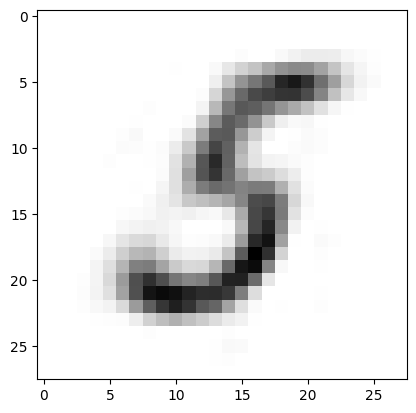

In [48]:
# Запустить для генерации цифры
N = 1
Z = torch.normal(0, 1, (N, size))
net.train(False)
x = net(Z).detach().numpy()
plt.imshow(x[0][0], cmap="Greys")